<a href="https://colab.research.google.com/github/Jash-Karani/comphy_assignment_2/blob/main/Jash_Karani_2022B5AA0726P_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.mlab as mlab
from scipy.stats import norm
from pylab import *
from scipy.optimize import leastsq

In [ ]:
E_max =50
N = 1000000

# **1.PROBABILITY DISTRIBUTION OF E AT REST FRAME:**

Text(0.5, 1.0, 'Plot showing the probability distribution of E in rest frame \n E_max taken as 50 (arbritary value)')

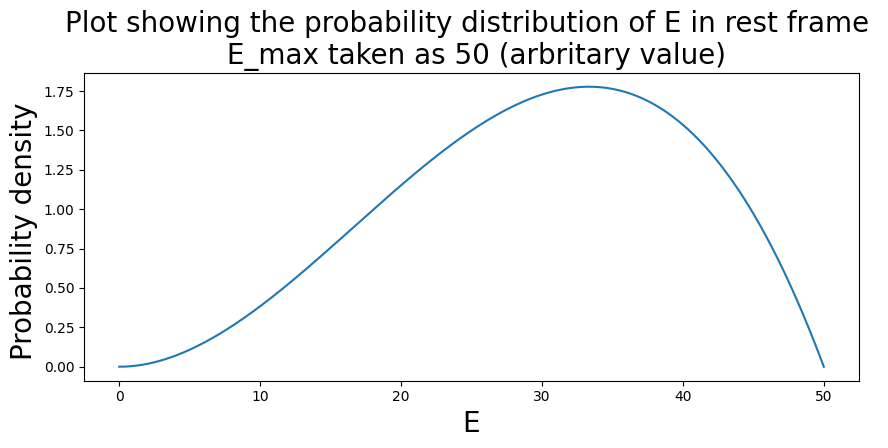

In [ ]:
E = np.linspace(0, E_max, 1000)
phi_rest_frame = 12*np.power((E/E_max),2)*(1-(E/E_max))
plt.figure(figsize=(10,4))
plt.plot(E, phi_rest_frame)
plt.xlabel('E', fontsize=20)
plt.ylabel('Probability density ', fontsize=20)

plt.title("Plot showing the probability distribution of E in rest frame \n E_max taken as 50 (arbritary value)", fontsize=20)


# **2. SAMPLING E DISTRIBUTION USING ACCEPT REJECT METHOD:**



In [ ]:
def g(x, mu, sigma):
  return 1/np.sqrt(2*np.pi)/sigma * np.exp(-0.5*((x-mu)/sigma)**2)

In [ ]:
def phi(E):
  if E < 0 or E > E_max:
        return 0
  return 12*np.power((E/E_max),2)*(1-(E/E_max))

Text(0.5, 1.0, 'phi_E_rest_frame distribution and  Mg(x) where g(x) is normal distribution')

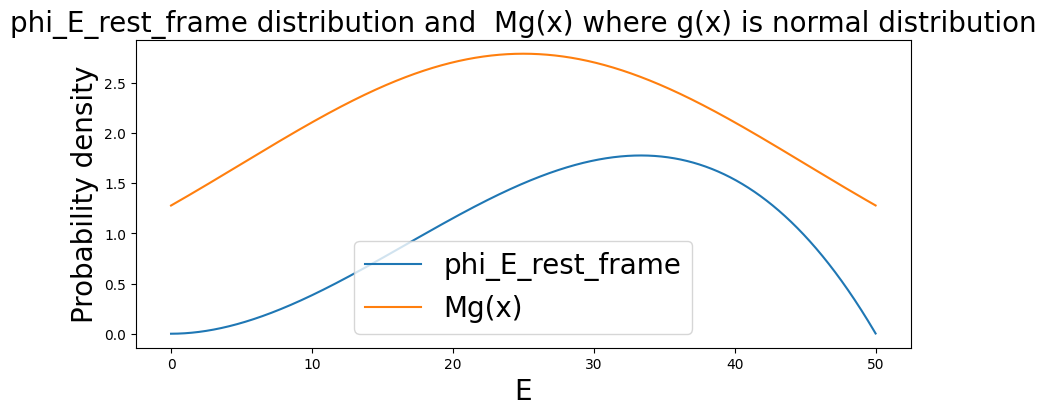

In [ ]:
x_vals = np.arange(0,E_max,0.01)
phi_vals = [phi(x) for x in x_vals]
g_vals = g(x_vals, 25, 20)
M = 140

plt.figure(figsize=(10,4))

plt.plot(x_vals, phi_vals)
plt.plot(x_vals, M*g_vals)
plt.legend(['phi_E_rest_frame', 'Mg(x)'], fontsize=20)
plt.xlabel('E', fontsize=20)
plt.ylabel('Probability density', fontsize=20)


plt.title("phi_E_rest_frame distribution and  Mg(x) where g(x) is normal distribution", fontsize=20)

In [ ]:
accept_reject_samples = []
for _ in range(N):
    candidate = np.random.normal(25,20)
    prob_accept = phi(candidate) / (M*g(candidate, 25, 20))

    if np.random.uniform() < prob_accept:
        accept_reject_samples.append(candidate)

In [ ]:
print(len(accept_reject_samples))

35512


Text(0.5, 1.0, 'Sampling from E distribution(Accept Reject)')

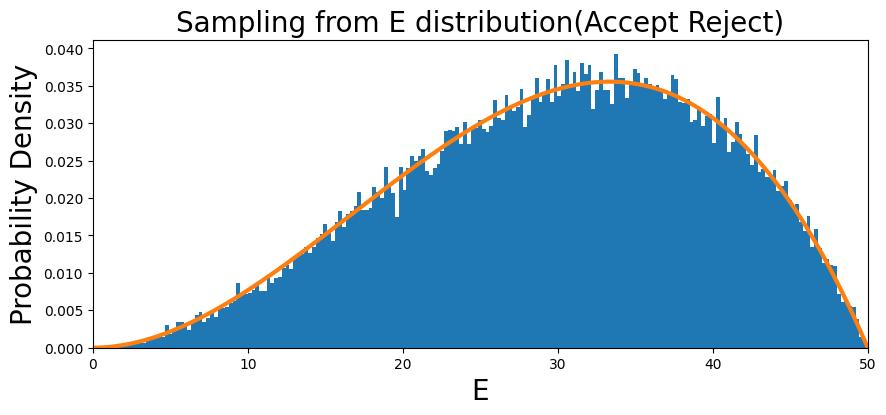

In [ ]:
plt.figure(figsize=(10,4))
plt.hist(accept_reject_samples, bins=200, density=True)
plt.xlabel('E', fontsize=20)
plt.ylabel('Probability Density', fontsize=20)
plt.plot(x_vals, [f/50 for f in phi_vals], linewidth=3)
plt.xlim(0,50)
plt.title("Sampling from E distribution(Accept Reject)", fontsize=20)

Text(0.5, 1.0, 'Correlation(Metropolis Hasting): -0.01')

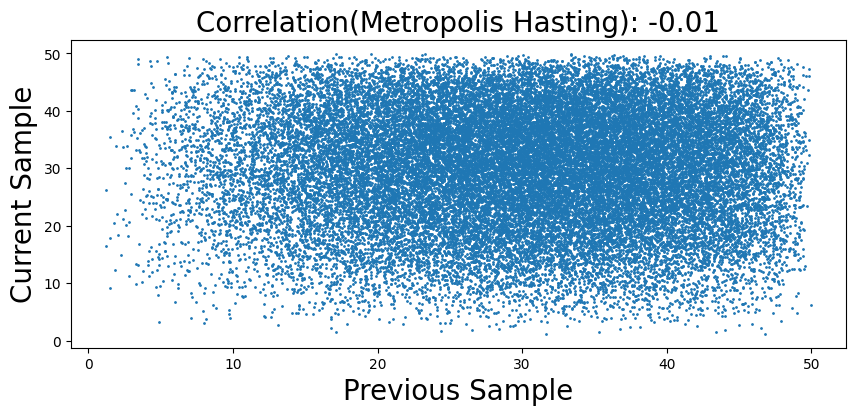

In [ ]:
plt.figure(figsize=(10,4))
plt.scatter(accept_reject_samples[:-1], accept_reject_samples[1:], s=1)
plt.xlabel('Previous Sample', fontsize=20)
plt.ylabel('Current Sample', fontsize=20)
corr = round(pearsonr(accept_reject_samples[:-1], accept_reject_samples[1:])[0], 2)
plt.title('Correlation(Metropolis Hasting): %s'%corr, fontsize=20)

# **3. SAMPLING E DISTRIBUTION USING METROPOLIS-HASTING ALGORITHM:**





In [311]:
metropolis_samples = [1]
num_accept = 0
for _ in range(N+10000):
    candidate = np.random.normal(metropolis_samples[-1], 20)
    prob = min(1, phi(candidate) / phi(metropolis_samples[-1]))

    if np.random.uniform(0,1) < prob:
        metropolis_samples.append(candidate)
        num_accept += 1
    else:
        metropolis_samples.append(metropolis_samples[-1])


In [ ]:
burn_in = 10000
retained_samples = metropolis_samples[burn_in+1:]

In [ ]:
print((num_accept / N))

0.57213


Text(0.5, 1.0, 'Sampling from E distribution(Metropolis Hasting)')

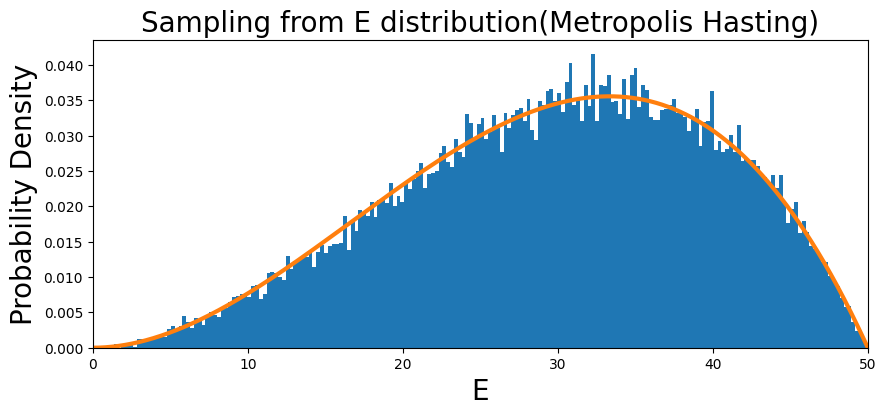

In [ ]:
plt.figure(figsize=(10,4))
plt.hist(retained_samples, bins=200, density=True)
plt.xlabel('E', fontsize=20)
plt.ylabel('Probability Density', fontsize=20)
plt.plot(x_vals, [f/50 for f in phi_vals], linewidth=3)
plt.xlim(0,50)
plt.title("Sampling from E distribution(Metropolis Hasting)", fontsize=20)


Text(0.5, 1.0, 'Correlation(Metropolis Hasting): 0.62')

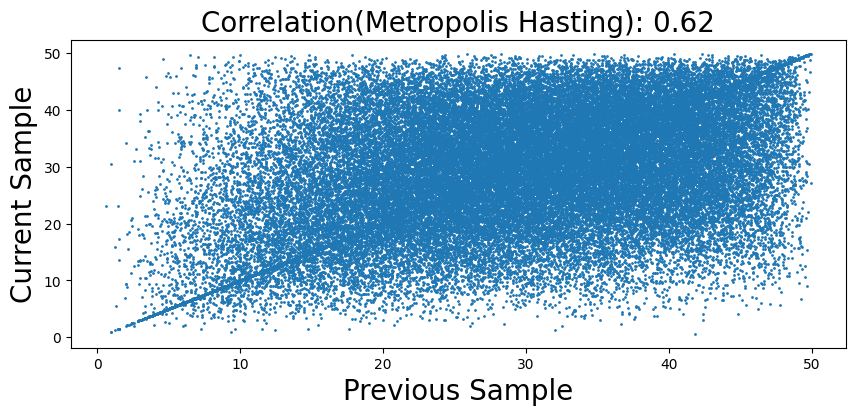

In [ ]:
plt.figure(figsize=(10,4))
plt.scatter(retained_samples[:-1], retained_samples[1:], s=1)
plt.xlabel('Previous Sample', fontsize=20)
plt.ylabel('Current Sample', fontsize=20)
corr = round(pearsonr(metropolis_samples[:-1], metropolis_samples[1:])[0], 2)
plt.title('Correlation(Metropolis Hasting): %s'%corr, fontsize=20)

# **3. SAMPLING cos(theta):**

In [ ]:
cos_sample= np.random.uniform(-1, 1, N)

Text(0.5, 1.0, 'Sampling cos(theta) from uniform distribution ')

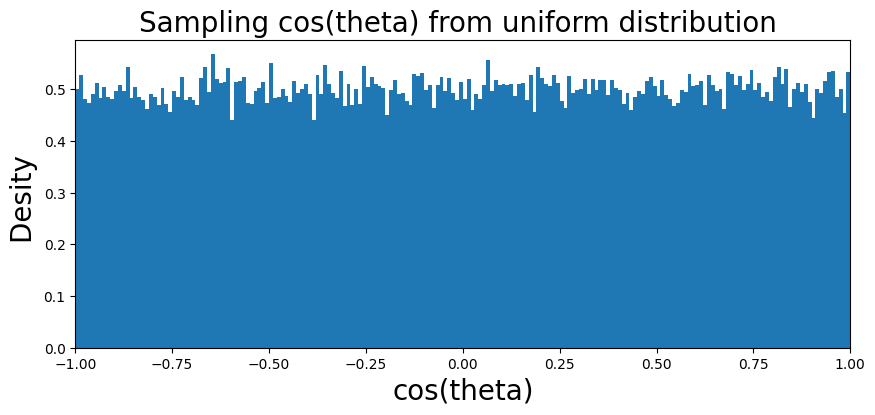

In [ ]:
plt.figure(figsize=(10,4))
plt.hist(cos_sample, bins=200, density=True)
plt.xlabel('cos(theta)', fontsize=20)
plt.ylabel('Desity ', fontsize=20)
plt.xlim(-1,1)
plt.title("Sampling cos(theta) from uniform distribution ", fontsize=20)

# **4.GETTING E' DISTRIBUTION(Metropolis Hasting)**

In [ ]:
E_prime_distributions = []

for beta in [0.01, 0.1, 0.9, 0.99]:
  gamma = 1 / np.sqrt(1 - np.power(beta,2))
  E_sample = np.array(retained_samples)
  E_prime_sample = gamma * E_sample * (1 + beta * cos_sample)
  print(E_prime_sample)
  E_prime_distributions.append(E_prime_sample)


[41.88574605 41.69594927 28.43994589 ... 46.47791036 31.27680622
 30.94233822]
[42.81923965 40.91180565 30.08437119 ... 49.15281196 32.37563683
 29.01427505]
[112.44372585  73.25755514  99.16009384 ... 161.7700559   93.03290623
  23.97736028]
[352.55524495 219.36397081 316.99700363 ... 517.09181116 294.11632359
  59.40096393]


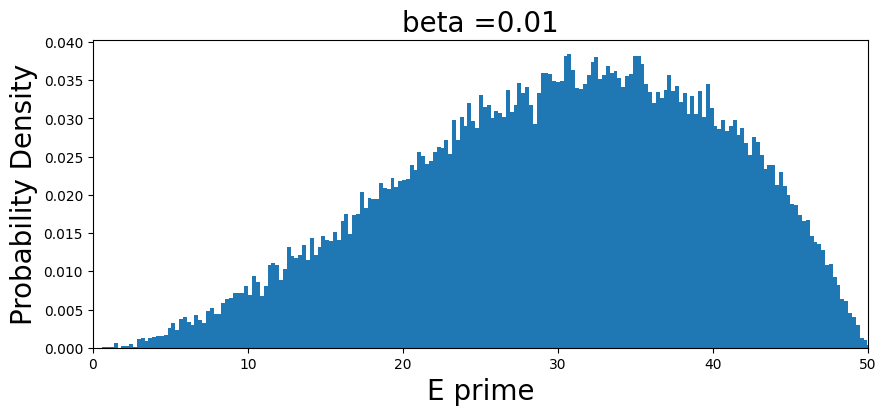

In [ ]:

# for i, beta in enumerate([0.01, 0.1, 0.9, 0.99]):
#   plt.hist(E_prime_distributions[i], bins=bins, density=True, alpha=0.6, label=f"β = {beta}")
#   plt.figure(figsize=(10, 6))
#   bins = np.linspace(0, E_max, 200)

plt.figure(figsize=(10,4))
plt.hist(E_prime_distributions[0], bins=200, density=True)
plt.xlabel('E prime', fontsize=20)
plt.ylabel('Probability Density', fontsize=20)
plt.title("beta =0.01", fontsize=20)
plt.xlim(0,50)
plt.show()


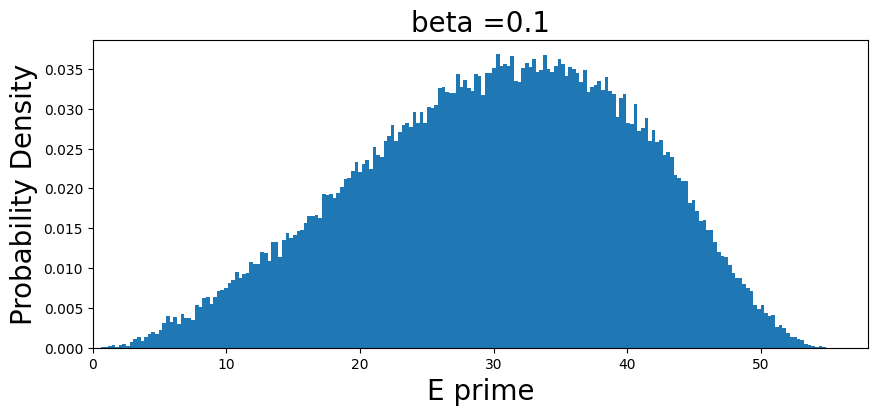

In [ ]:

plt.figure(figsize=(10,4))
plt.hist(E_prime_distributions[1], bins=200, density=True)
plt.xlabel('E prime', fontsize=20)
plt.ylabel('Probability Density', fontsize=20)
plt.title("beta =0.1", fontsize=20)
plt.xlim(0,58)
plt.show()

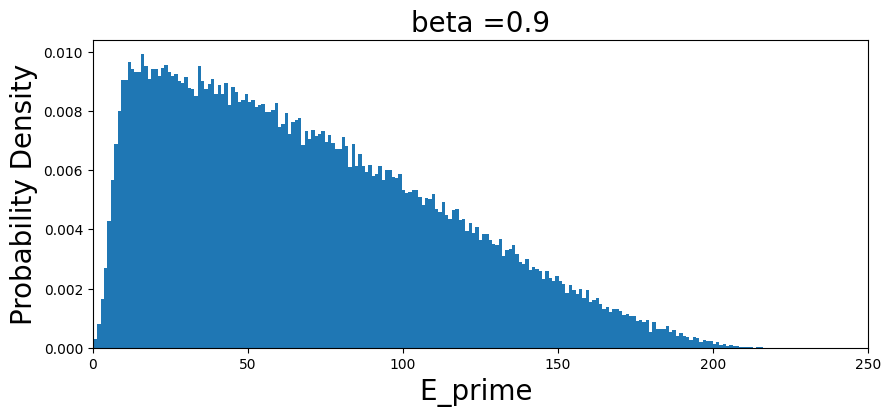

In [ ]:

plt.figure(figsize=(10,4))
plt.hist(E_prime_distributions[2], bins=200, density=True)
plt.xlabel('E_prime ', fontsize=20)
plt.ylabel('Probability Density', fontsize=20)
plt.title("beta =0.9", fontsize=20)
plt.xlim(0,250)
plt.show()

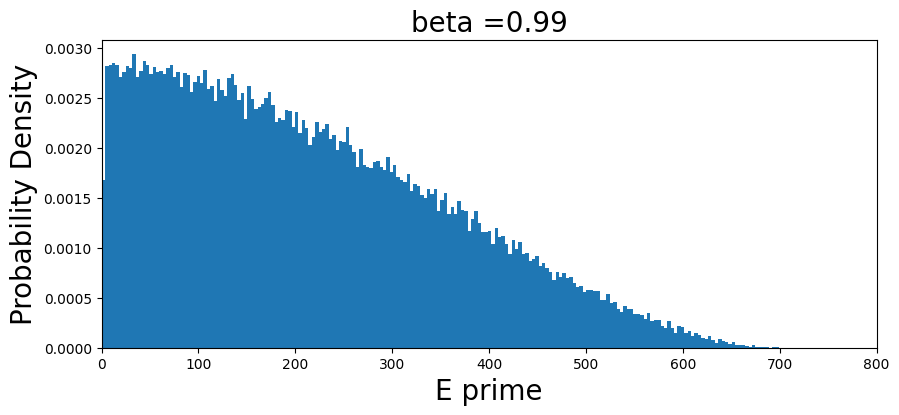

In [ ]:
plt.figure(figsize=(10,4))
plt.hist(E_prime_distributions[3], bins=200, density=True)
plt.xlabel('E prime', fontsize=20)
plt.ylabel('Probability Density', fontsize=20)
plt.title("beta =0.99", fontsize=20)
plt.xlim(0,800)
plt.show()

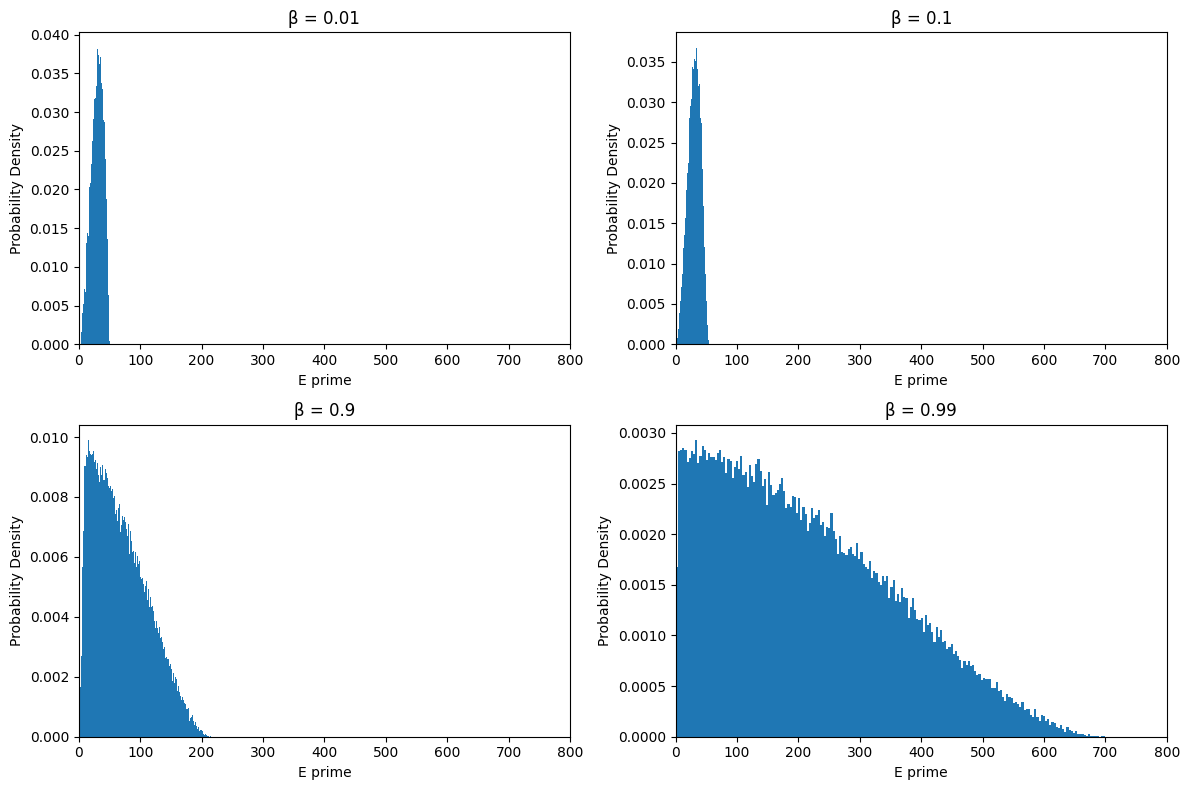

In [ ]:
E_prime_distributions = [E_prime_distributions[0], E_prime_distributions[1], E_prime_distributions[2], E_prime_distributions[3]]
betas = [0.01, 0.1, 0.9, 0.99]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, beta in enumerate(betas):
    row = i // 2
    col = i % 2
    axes[row, col].hist(E_prime_distributions[i], bins=200, density=True)
    axes[row, col].set_xlabel('E prime')
    axes[row, col].set_ylabel('Probability Density')
    axes[row, col].set_title(f"β = {beta}")
    axes[row, col].set_xlim(0, 800)

plt.tight_layout()
plt.show()

# **5.GETTING E' DISTRIBUTION(Accept Reject)**


In [ ]:
E_prime_distributions = []
cos_sample= np.random.uniform(-1, 1, len(accept_reject_samples))
for beta in [0.01, 0.1, 0.9, 0.99]:
  gamma = 1 / np.sqrt(1 - np.power(beta,2))
  E_sample = np.array(accept_reject_samples)
  E_prime_sample = gamma * E_sample * (1 + beta * cos_sample)
  print(E_prime_sample)
  E_prime_distributions.append(E_prime_sample)


[ 9.45824189 33.97092676 37.31924384 ... 44.52543225 34.26329811
 22.2870162 ]
[ 9.22259459 35.6465581  35.37160228 ... 44.28521466 35.12813568
 23.18748886]
[ 15.31350915 111.93011216  37.4463741  ...  91.70796961  94.26590176
  68.94452727]
[ 45.32303352 356.48114598 100.65700627 ... 280.1115974  296.17072864
 218.60181579]


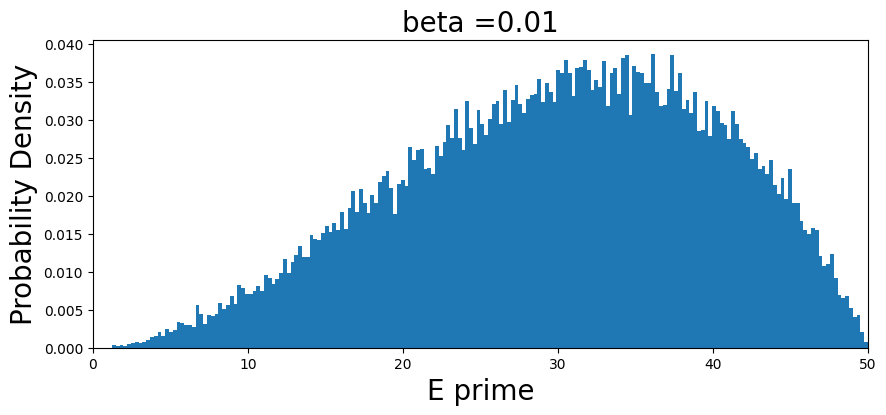

In [ ]:

# for i, beta in enumerate([0.01, 0.1, 0.9, 0.99]):
#   plt.hist(E_prime_distributions[i], bins=bins, density=True, alpha=0.6, label=f"β = {beta}")
#   plt.figure(figsize=(10, 6))
#   bins = np.linspace(0, E_max, 200)

plt.figure(figsize=(10,4))
plt.hist(E_prime_distributions[0], bins=200, density=True)
plt.xlabel('E prime', fontsize=20)
plt.ylabel('Probability Density', fontsize=20)
plt.title("beta =0.01", fontsize=20)
plt.xlim(0,50)
plt.show()


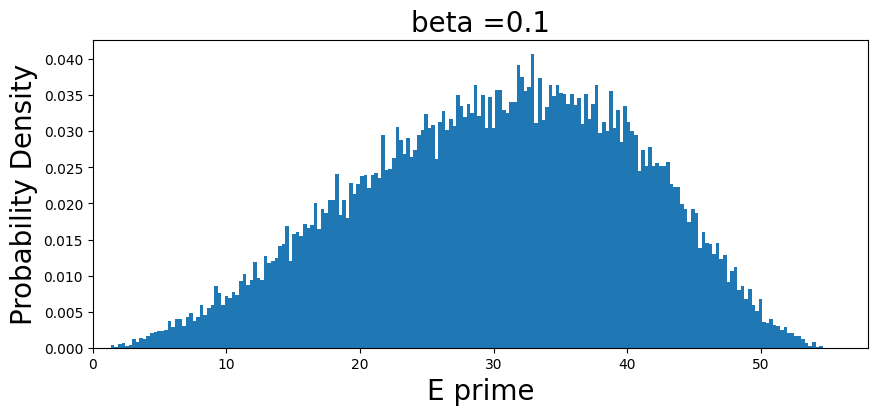

In [ ]:

plt.figure(figsize=(10,4))
plt.hist(E_prime_distributions[1], bins=200, density=True)
plt.xlabel('E prime', fontsize=20)
plt.ylabel('Probability Density', fontsize=20)
plt.title("beta =0.1", fontsize=20)
plt.xlim(0,58)
plt.show()

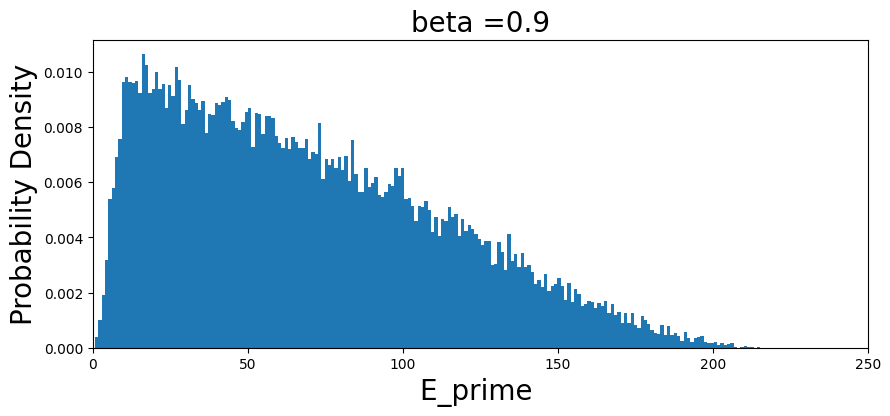

In [ ]:

plt.figure(figsize=(10,4))
plt.hist(E_prime_distributions[2], bins=200, density=True)
plt.xlabel('E_prime ', fontsize=20)
plt.ylabel('Probability Density', fontsize=20)
plt.title("beta =0.9", fontsize=20)
plt.xlim(0,250)
plt.show()

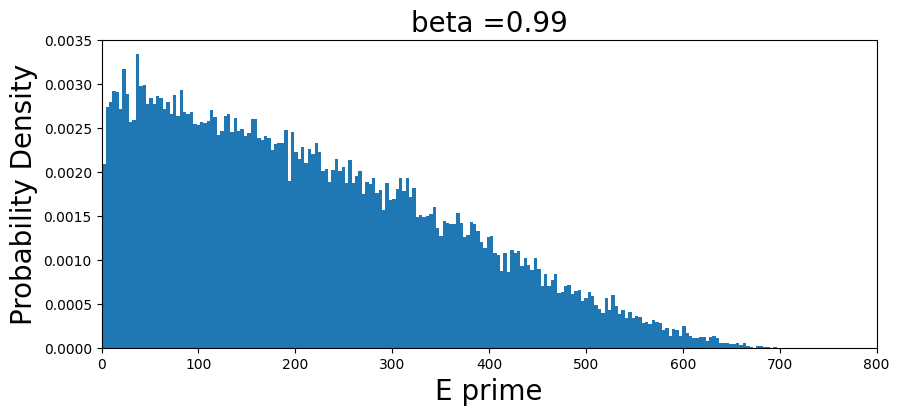

In [ ]:
plt.figure(figsize=(10,4))
plt.hist(E_prime_distributions[3], bins=200, density=True)
plt.xlabel('E prime', fontsize=20)
plt.ylabel('Probability Density', fontsize=20)
plt.title("beta =0.99", fontsize=20)
plt.xlim(0,800)
plt.show()

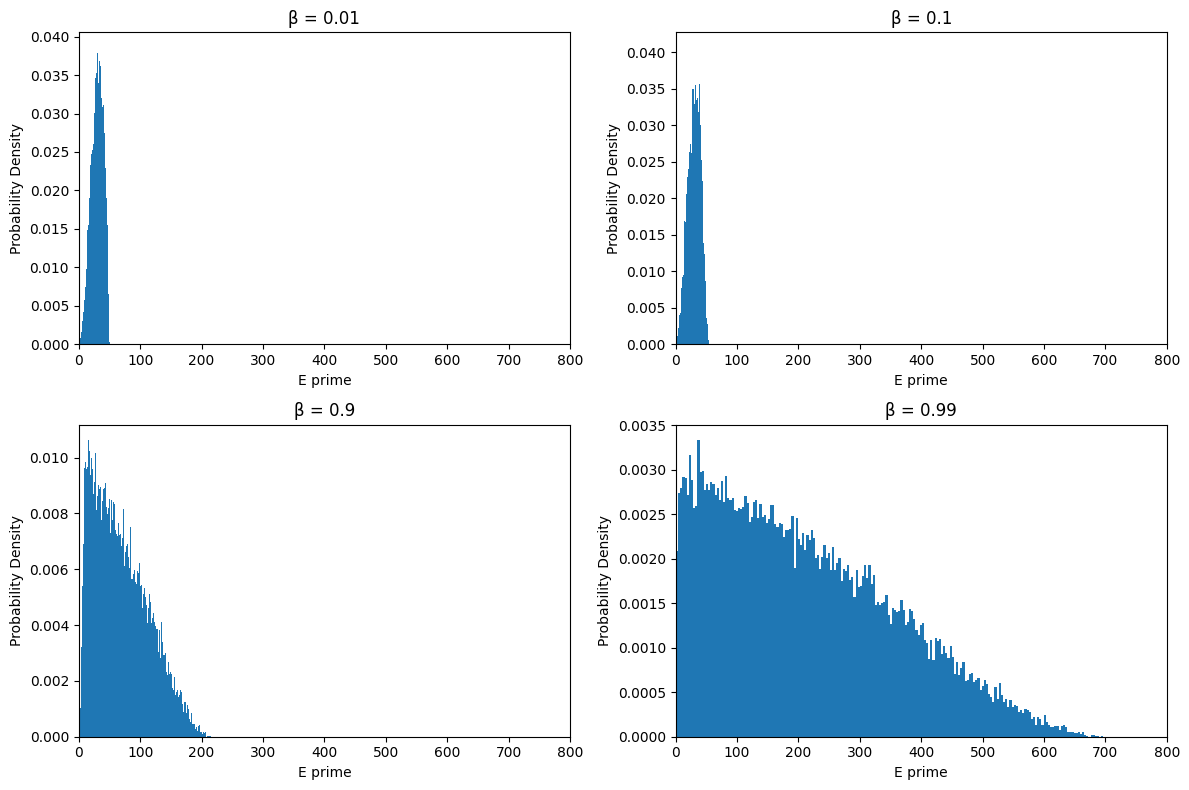

In [ ]:
E_prime_distributions = [E_prime_distributions[0], E_prime_distributions[1], E_prime_distributions[2], E_prime_distributions[3]]
betas = [0.01, 0.1, 0.9, 0.99]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, beta in enumerate(betas):
    row = i // 2
    col = i % 2
    axes[row, col].hist(E_prime_distributions[i], bins=200, density=True)
    axes[row, col].set_xlabel('E prime')
    axes[row, col].set_ylabel('Probability Density')
    axes[row, col].set_title(f"β = {beta}")
    axes[row, col].set_xlim(0, 800)

plt.tight_layout()
plt.show()